In [41]:
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append("..")
sys.path.append("../d2c/")
# Generating random data for the test
np.random.seed(42)  # Seed for reproducibility
from utils import print_dag, dag_to_formula, show_dag, make_name
from d2c import D2C



In [42]:
# with open('../data/ts_test.pkl', 'rb') as f:
#     observations, dags, updated_dags = pickle.load(f)



In [43]:
with open('../data/dag_test.pkl', 'rb') as f:
    observations, dags = pickle.load(f)



In [76]:
chosen = 1

In [77]:
dag = dags[chosen]
observation = observations[chosen]
# updated_dag = updated_dags[chosen]

In [78]:
dag_to_formula(dag)

4 = 0
5 = 0
9 = 0
0 = 0.21551*4 + 0
6 = -0.15147*4 + 0
3 = 0.30462*0 + 0
2 = 0.41781*6 + -0.13301*9 + 0
8 = 0.30953*3 + 0
7 = -0.2588*2 + -0.09016*5 + 0
1 = 0.39157*7 + 0



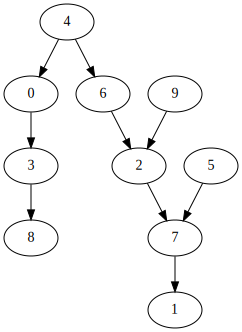

In [79]:
show_dag(dag)

In [80]:
# Test 1/4 MB with DAG, no constraint on MB_size 
# Test 2/4 MB with DAG, constraint on MB_size
# Test 3/4 MB without DAG, no constraint on MB_size
# Test 4/4 MB without DAG, constraint on MB_size

In [81]:
#Test 1

# graph

In [82]:
d2c = D2C(dags, observations)

In [83]:
real_mbs = []
for i in range(observations[chosen].shape[1]):
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=10)
    real_mbs.append(result)
    print(result)


[3, 4]
[7]
[9, 5, 6, 7]
[0, 8]
[0, 6]
[2, 7]
[9, 2, 4]
[1, 2, 5]
[3]
[2, 6]


# mrmr


In [92]:
d2c = D2C(None, observations, boot='mrmr')

In [93]:
mrmr_mbs = []
for i in range(observations[chosen].shape[1]):
    # print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=4)
    mrmr_mbs.append(result)
    print(result)


[4, 3, 8, 6]
[8, 4, 0, 3]
[6, 9, 5, 4]
[0, 4, 8, 6]
[0, 3, 6, 9]
[8, 7, 2, 9]
[2, 4, 0, 3]
[5, 3, 9, 4]
[3, 0, 4, 5]
[2, 4, 5, 7]


# rankrho

In [94]:
d2c = D2C(None, observations, boot='rank')

In [95]:
rankrho_mbs = []
for i in range(observations[chosen].shape[1]):
    # print('MB for node', i, end=': ')
    result = d2c.compute_markov_blanket(chosen, observation,i, MB_size=4)
    rankrho_mbs.append(result)
    print(result)


[3, 4, 8, 6]
[7, 8, 5, 9]
[6, 4, 0, 3]
[0, 8, 4, 2]
[0, 6, 3, 8]
[7, 9, 1, 6]
[2, 4, 0, 3]
[5, 1, 9, 0]
[3, 0, 4, 2]
[5, 2, 7, 0]


In [96]:
def evaluate_mb(estimated_mbs, real_mbs):
    total = 0
    score = 0
    for index_mb, estimated_mb in enumerate(estimated_mbs):
        real_mb = real_mbs[index_mb]
        for elem in estimated_mb:
            total += 1
            if elem in real_mb:
                score += 1
    return score / total

In [97]:
evaluate_mb(mrmr_mbs,real_mbs)

0.4

In [98]:
evaluate_mb(rankrho_mbs,real_mbs)

0.375